In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard, EarlyStopping
import tensorflow as tf
import datetime, IPython
import numpy as np
import os


In [2]:
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU')) 


True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
def stop_cuda():
    from numba import cuda 
    device = cuda.get_current_device()
    device.reset()

In [4]:
path = os.getcwd()

In [5]:
#train_dir = '/home/jidesh/ML/CNN/Facial-expression/data/train'
train_dir = path+'/dataset/FacialExpression-Dataset/Train'
val_dir = path+'/dataset/FacialExpression-Dataset/Test'

checkpoint_losspath = path+'/Checkpoints/checkpoints_loss/Model-epoch_{epoch:02d}--val_loss_{val_loss:.2f}'
checkpoint_accpath = path+'/Checkpoints/checkpoints_acc/Model-epoch_{epoch:02d}--val_categorical_accuracy_{val_categorical_accuracy:.2f}'


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 64
img_width = 48
img_height = 48

print("Train : ",train_dir)
print("Val : ",val_dir)

Train :  d:\project\project/dataset/FacialExpression-Dataset/Train
Val :  d:\project\project/dataset/FacialExpression-Dataset/Test


In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 76577 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
print("Train set size : {} class : {} no.of : {}".format(train_generator.samples,train_generator.class_indices,train_generator.num_classes))
train_sample_size = train_generator.samples
validation_sample_size = validation_generator.samples
print("validate set size : {} class : {} no.of : {}".format(validation_generator.samples,validation_generator.class_indices,validation_generator.num_classes))

Train set size : 76577 class : {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6} no.of : 7
validate set size : 7178 class : {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6} no.of : 7


In [8]:
emotion_model = Sequential()
 
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(img_height,img_width,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))
 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))


emotion_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))
 
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(train_generator.num_classes, activation='softmax'))
################################################################################
#emotion_model.load_weights(path+'/Models/emotion-reg-weight-0.8510841131210327.h5')

In [9]:
emotion_dict = train_generator.class_indices
print(emotion_dict)
#swapping key and values in dictionary
emotion_dict={value:key for key, value in emotion_dict.items()}
print(emotion_dict)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [10]:
checkpoint_loss = ModelCheckpoint(
    filepath=checkpoint_losspath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose =1
)
checkpoint_acc = ModelCheckpoint(
    filepath=checkpoint_accpath,
    save_best_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    verbose =1
)
earlystop = EarlyStopping(monitor='val_loss', patience=8,mode='min')
#Tensorboard
time1 = (datetime.datetime.now() ).strftime('%c')
time1 = time1.replace(':','_')
#time1 = time1.replace(' ','_')
tensorboard = TensorBoard(path+'/Tensorboard/'+time1)
callback = [checkpoint_loss,checkpoint_acc,tensorboard,earlystop]

----------------------------------------------------------------------------------------------------------------------------------------------

**Adagrad Optimiser**

In [11]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adagrad(learning_rate=0.01),metrics=['categorical_accuracy'])
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 512)       5

In [12]:
#%%time
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=train_sample_size // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=validation_sample_size // batch_size,
        callbacks=callback)

Epoch 1/100
1196/1196 [==============================] - 1009s 840ms/step - loss: 1.9238 - categorical_accuracy: 0.2119 - val_loss: 1.9152 - val_categorical_accuracy: 0.2473

Epoch 00001: val_loss improved from inf to 1.91523, saving model to d:\project\project/Checkpoints/checkpoints_loss\Model-epoch_01--val_loss_1.92
INFO:tensorflow:Assets written to: d:\project\project/Checkpoints/checkpoints_loss\Model-epoch_01--val_loss_1.92\assets

Epoch 00001: val_categorical_accuracy improved from -inf to 0.24735, saving model to d:\project\project/Checkpoints/checkpoints_acc\Model-epoch_01--val_categorical_accuracy_0.25
INFO:tensorflow:Assets written to: d:\project\project/Checkpoints/checkpoints_acc\Model-epoch_01--val_categorical_accuracy_0.25\assets
Epoch 2/100
1196/1196 [==============================] - 214s 179ms/step - loss: 1.9042 - categorical_accuracy: 0.2212 - val_loss: 1.8737 - val_categorical_accuracy: 0.2606

Epoch 00002: val_loss improved from 1.91523 to 1.87368, saving model to

In [14]:
path1 = path+'/Models'
emotion_model1=emotion_model
emotion_model1.save(path1+'/adagrad')
emotion_model.save_weights(path1+f"/adagram_weights/emotion-reg-weight-{emotion_model_info.history['categorical_accuracy'][-1]}"+".h5")

INFO:tensorflow:Assets written to: d:\project\project/Models/adagrad\assets


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


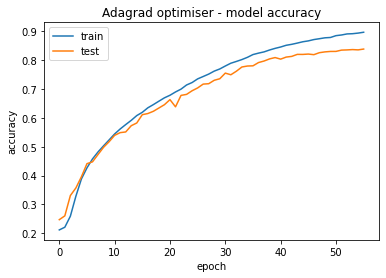

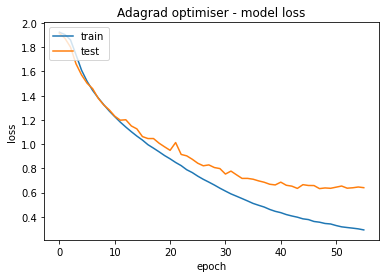

In [15]:
# list all data in history
print(emotion_model_info.history.keys())
# summarize history for accuracy
plt.plot(emotion_model_info.history['categorical_accuracy'])
plt.plot(emotion_model_info.history['val_categorical_accuracy'])
plt.title('Adagrad optimiser - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Adagrad optimiser - model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
%load_ext tensorboard
%tensorboard --logdir path+'/Tensorboard/'

Reusing TensorBoard on port 6006 (pid 17032), started 10:59:50 ago. (Use '!kill 17032' to kill it.)

-------------------------------------------------------------------------------------------------------------------------------------------------

**Convolution Matrix**

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
target_names = list(emotion_dict.values())
print(target_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [19]:
y_pred=emotion_model.predict(train_generator)
y_pred=np.argmax(y_pred,axis=1)
print('confusion matrix')
cm=confusion_matrix(train_generator.classes,y_pred)
print(cm)

confusion matrix
[[1292 1369 1254 2193 1313 1320 1270]
 [1285 1338 1278 2070 1362 1336 1341]
 [1290 1257 1281 2143 1240 1447 1353]
 [2155 2175 2057 3417 2161 2168 2131]
 [1314 1334 1242 2187 1328 1339 1293]
 [1280 1352 1272 2226 1366 1385 1352]
 [1308 1359 1251 2119 1371 1300 1303]]


In [20]:
y_pred=emotion_model.predict(validation_generator)
y_pred=np.argmax(y_pred,axis=1)
print('confusion matrix')
cm=confusion_matrix(validation_generator.classes,y_pred)
print(cm)

confusion matrix
[[116  23 120 214 152 200 133]
 [ 16   3  16  24  19  24   9]
 [157  22 124 272 162 189  98]
 [246  50 203 437 292 333 213]
 [162  26 146 312 177 241 169]
 [186  33 145 340 186 223 134]
 [127  22  72 196 140 173 101]]


C:\Users\logesh\AppData\Local\Temp/ipykernel_3712/2774912854.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_names)
C:\Users\logesh\AppData\Local\Temp/ipykernel_3712/2774912854.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_names)


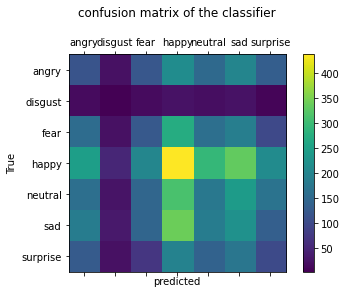

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
plt.title('confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

In [22]:
Y_pred = emotion_model.predict(validation_generator, 400 // 4)

y_pred = np.argmax(Y_pred, axis=1)
print(validation_generator.classes)

print('Confusion Matrix')

cfm = confusion_matrix(validation_generator.classes, y_pred)

print(cfm)

[0 0 0 ... 6 6 6]
Confusion Matrix
[[126  17 124 253 146 167 125]
 [ 20   2   8  36  16  15  14]
 [140  30 118 256 167 198 115]
 [255  45 190 450 288 340 206]
 [175  36 137 315 185 238 147]
 [170  26 146 290 212 244 159]
 [124  23 103 195 114 181  91]]


In [23]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.13      0.13       958
           1       0.01      0.02      0.01       111
           2       0.14      0.12      0.13      1024
           3       0.25      0.25      0.25      1774
           4       0.16      0.15      0.16      1233
           5       0.18      0.20      0.19      1247
           6       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



--------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
# %%javascript
# IPython.notebook.save_notebook()

In [25]:
# #pip install twilio
# from twilio.rest import Client

In [26]:
# import json
 
# # Opening JSON file
# f = open(path+'/twilo.json')
 
# # returns JSON object as
# # a dictionary
# data = json.load(f)
 
# # Iterating through the json
# # list
# print(data)
 
# # Closing file
# f.close()

In [27]:
# message =f"Accuracy : {emotion_model_info.history['categorical_accuracy'][-1]} Loss : {emotion_model_info.history['loss'][-1]} val_accuracy : {emotion_model_info.history['val_categorical_accuracy'][-1]} val_loss : {emotion_model_info.history['val_loss'][-1]}"

# # # Your Account Sid and Auth Token from twilio account

# # # instantiating the Client
# client = Client(data['account_sid'], data['auth_token'])
# # # sending message
# message = client.messages.create(body=message, from_= '+917305746782', to='+917305746782')
# # # printing the sid after success
# print(message.sid)

In [28]:
import os
len(os.listdir(path+'/dataset/FacialExpression-Dataset/Train/angry'))

10011

In [29]:
# #compress tensorboard data and check ponits
# checkpoints = shutil.make_archive('Checkpoints', "zip", path+'/Checkpoints/zip')
# tensorboard = shutil.make_archive('Tensorboard',"zip",path+'/Tensorboard/zip')

In [30]:
# from google.colab import files
# from shutil import  copy2

# t = input("C to copy to drive , D to download")
# if t == 'c' or t == 'C':
#   copy2('/content/Checkpoints.zip','/content/drive/MyDrive/7thSem_project/Checkpoints.zip')
#   copy2('/content/Tensorboard.zip','/content/drive/MyDrive/7thSem_project/Tensorboard.zip')
# elif t == 'd' or t =='D':

#   files.download('/content/Checkpoints.zip')

#   files.download('/content/Tensorboard.zip')

------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
# import cv2
# import numpy as np

In [32]:
# # start the webcam feed
# cap = cv2.VideoCapture(0)
# while True:
#     # Find haar cascade to draw bounding box around face
#     ret, frame = cap.read()
#     if not ret:
#         break
#     bounding_box = cv2.CascadeClassifier('C:\\Users\\logesh\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

#     for (x, y, w, h) in num_faces:
#         cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
#         roi_gray_frame = gray_frame[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
#         emotion_prediction = emotion_model.predict(cropped_img)
#         maxindex = int(np.argmax(emotion_prediction))
#         cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#     cv2.imshow('Facial Expression', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

In [33]:
# cap.release()
# cv2.destroyAllWindows()

In [34]:
stop_cuda()

AttributeError: 'AxesSubplot' object has no attribute 'heapmap'

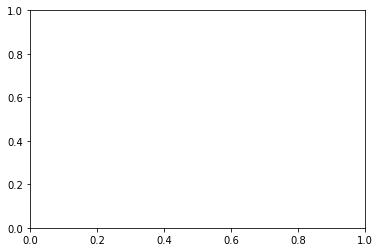

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = [ [116,  23, 120, 214, 152, 200, 133], [ 16,   3,  16,  24,  19,  24,   9], [157,  22, 124, 272, 162, 189,  98], [246,  50, 203, 437, 292, 333, 213], [162,  26, 146, 312, 177, 241, 169], [186,  33, 145, 340, 186, 223, 134], [127,  22,  72, 196, 140, 173, 101]]
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
fig=plt.figure()
ax=sns.subplot(111)
cax=ax.heapmap(cm)
plt.title('confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

In [6]:
# import seaborn
# import matplotlib.pyplot as plt
 
 
# def plot_confusion_matrix(data, labels, output_filename):
#     """Plot confusion matrix using heatmap.
 
#     Args:
#         data (list of list): List of lists with confusion matrix data.
#         labels (list): Labels which will be plotted across x and y axis.
#         output_filename (str): Path to output file.
 
#     """
#     seaborn.set(color_codes=True)
#     plt.figure(1, figsize=(16, 10))
 
#     plt.title("Confusion Matrix")
 
#     seaborn.set(font_scale=1.4)
#     ax = seaborn.heatmap(data, fmt='g', annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
#     ax.set_xticklabels(labels)
#     ax.set_yticklabels(labels)
 
#     ax.set(ylabel="True Label", xlabel="Predicted Label")
#     # plt.show()
#     plt.savefig(output_filename, bbox_inches='tight', dpi=300)
#     plt.close()


# cm = [[126,  17, 124, 253, 146, 167, 125],
#  [ 20,   2,   8,  36,  16,  15,  14],
#  [140,  30, 118, 256, 167, 198, 115],
#  [255,  45, 190, 450, 288, 340, 206],
#  [175,  36, 137, 315, 185, 238, 147],
#  [170,  26, 146, 290, 212, 244, 159],
#  [124,  23, 103, 195, 114, 181,  91]]
# target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
 

In [7]:
# plot_confusion_matrix(cm, target_names, "adagrad_confusion_matrix.png")

In [5]:
# print(cm)

[[126, 17, 124, 253, 146, 167, 125], [20, 2, 8, 36, 16, 15, 14], [140, 30, 118, 256, 167, 198, 115], [255, 45, 190, 450, 288, 340, 206], [175, 36, 137, 315, 185, 238, 147], [170, 26, 146, 290, 212, 244, 159], [124, 23, 103, 195, 114, 181, 91]]
